In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('DB_dataset.csv')

In [3]:
df.shape

(500, 2)

In [4]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [5]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
std_sca=StandardScaler()
features= pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
features.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


In [9]:
eps= [0.1,0.2,0.3,0.4,0.5]
min_nodes=range(1,11)

In [12]:
output=[]
for i in eps:
    for j in min_nodes:
        labels= DBSCAN(eps=i,min_samples=j).fit(features).labels_
        score=silhouette_score(features,labels)
        output.append([i,j,score])
print(output)        

[[0.1, 1, np.float64(-0.04299681057231643)], [0.1, 2, np.float64(0.2832200472847609)], [0.1, 3, np.float64(0.42737747491884875)], [0.1, 4, np.float64(0.5359027025302264)], [0.1, 5, np.float64(0.4827750201294571)], [0.1, 6, np.float64(0.4076103765285375)], [0.1, 7, np.float64(0.4749535686603094)], [0.1, 8, np.float64(0.36094434711787066)], [0.1, 9, np.float64(0.3333993335941656)], [0.1, 10, np.float64(0.3612527257725542)], [0.2, 1, np.float64(0.4246458392966885)], [0.2, 2, np.float64(0.4246458392966885)], [0.2, 3, np.float64(0.4246458392966885)], [0.2, 4, np.float64(0.6793428586100531)], [0.2, 5, np.float64(0.6791715296437162)], [0.2, 6, np.float64(0.6811897093459002)], [0.2, 7, np.float64(0.6811897093459002)], [0.2, 8, np.float64(0.6811897093459002)], [0.2, 9, np.float64(0.6772243433773901)], [0.2, 10, np.float64(0.6611112232392293)], [0.3, 1, np.float64(0.6636830126381724)], [0.3, 2, np.float64(0.6636830126381724)], [0.3, 3, np.float64(0.6636830126381724)], [0.3, 4, np.float64(0.66368

In [18]:
a=pd.DataFrame(output,columns=['eps','min_node','score'])
score=a.loc[:,'score'].max()
score

0.6811897093459002

In [21]:
a[a.score==score]

,eps,min_node,score
15,0.2,6,0.68119
16,0.2,7,0.68119
17,0.2,8,0.68119


In [23]:
labels= DBSCAN(eps=0.2,min_samples=7).fit(features).labels_
np.unique(labels)

array([-1,  0,  1,  2])

<Axes: xlabel='Weight', ylabel='Height'>

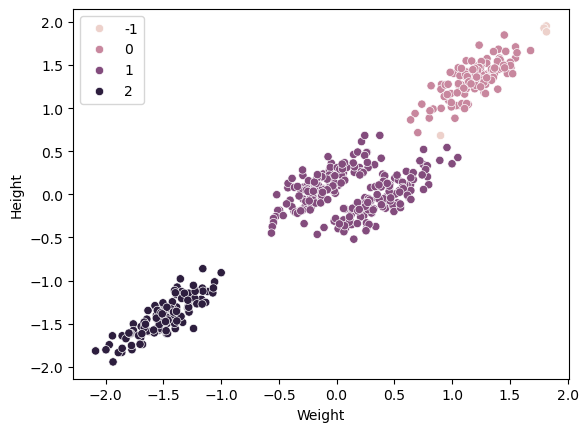

In [24]:
sns.scatterplot(data=features,x='Weight',y='Height',hue=labels)